In [9]:
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage.metrics import peak_signal_noise_ratio as compare_psnr

In [11]:
target = 'gaussian'

In [20]:
results = []
for trial in os.listdir('.'):
    if trial.split('_')[0] == target:
        results.append(trial)
        
results.sort()

def load_trained(path):
    noise = np.load(os.path.join(path, 'noise.npy'))
    noisy = np.load(os.path.join(path, 'noisy.npy'))
    original = np.load(os.path.join(path, 'original.npy'))
    recovered = np.load(os.path.join(path, 'recovered.npy'))
    residual_curve = np.load(os.path.join(path, 'residual_curve.npy'))
    
    return noise, noisy, original, recovered, residual_curve

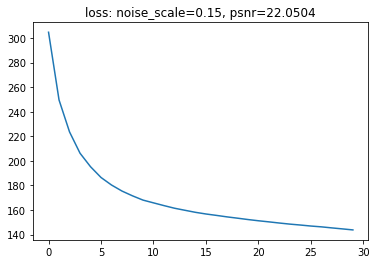

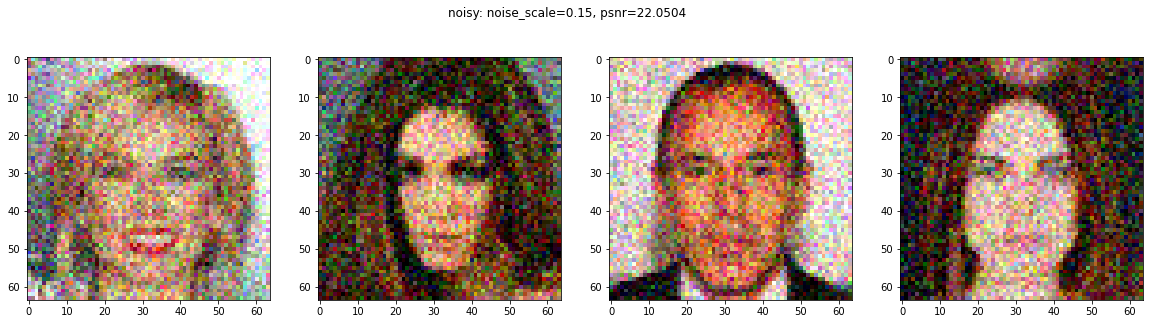

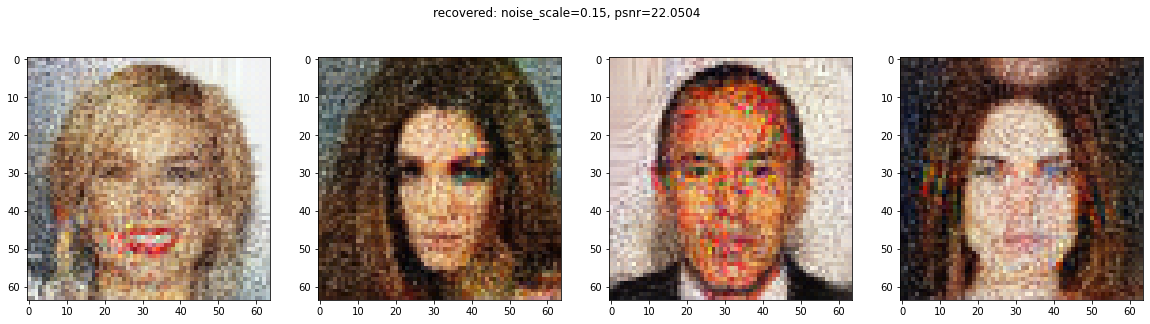

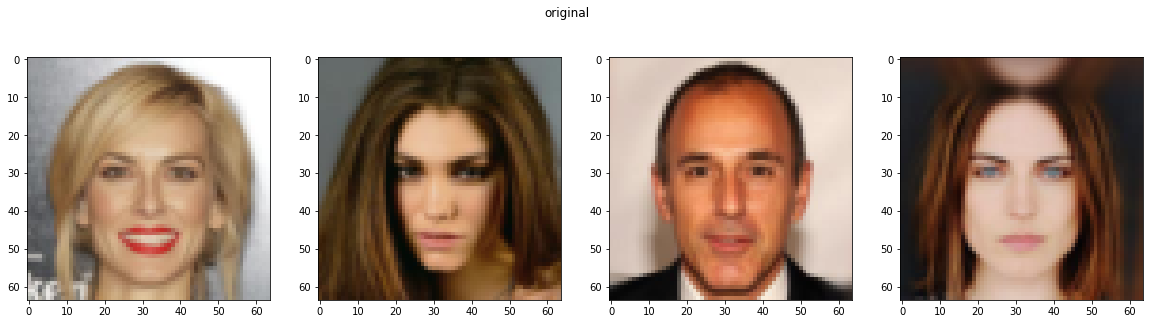

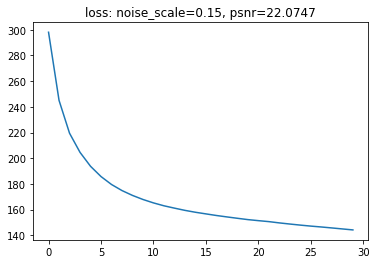

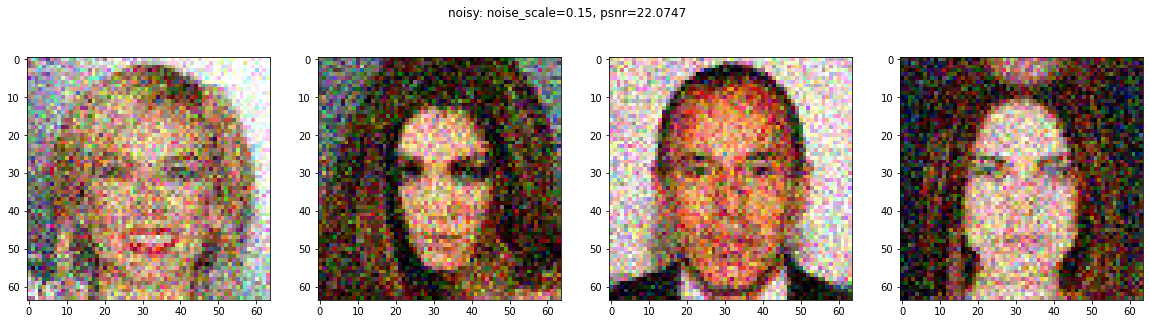

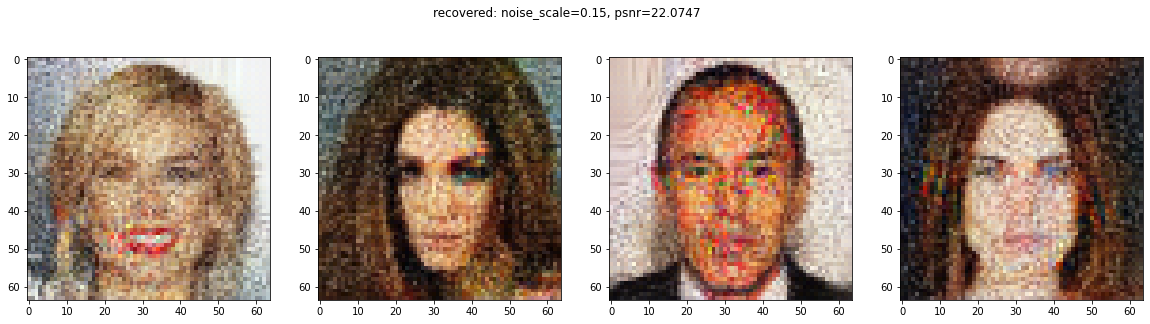

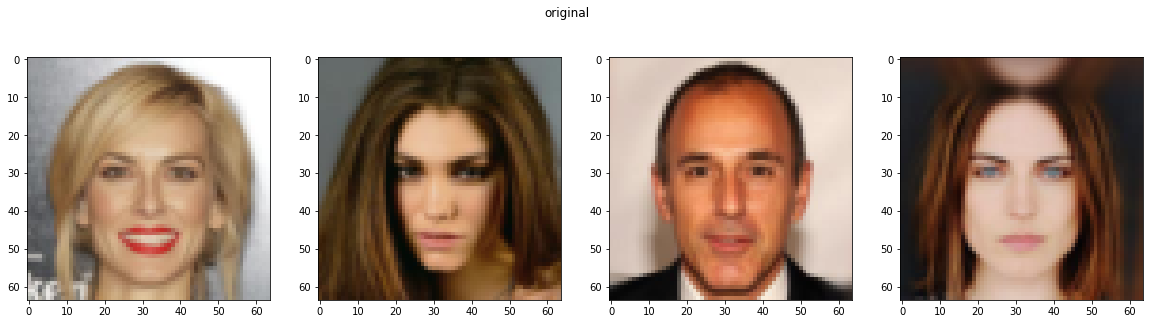

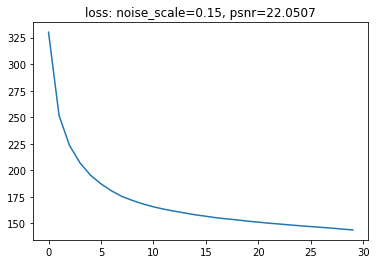

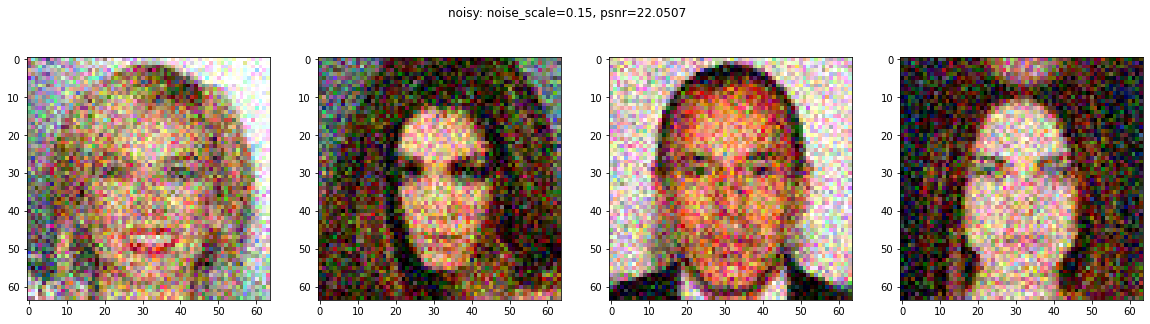

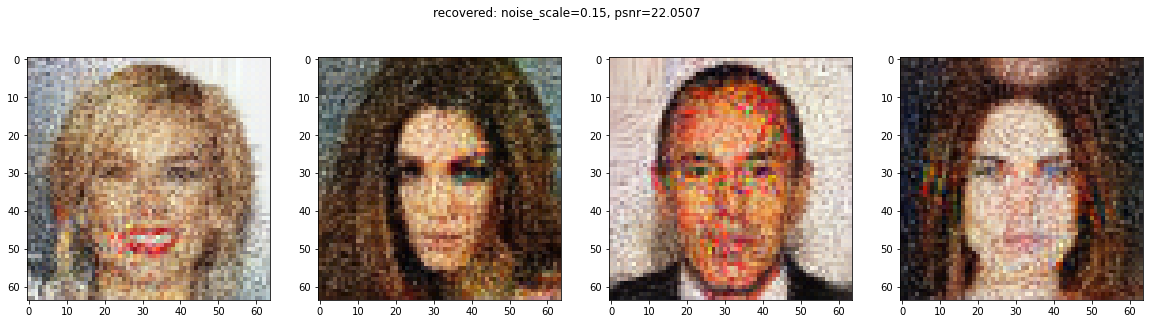

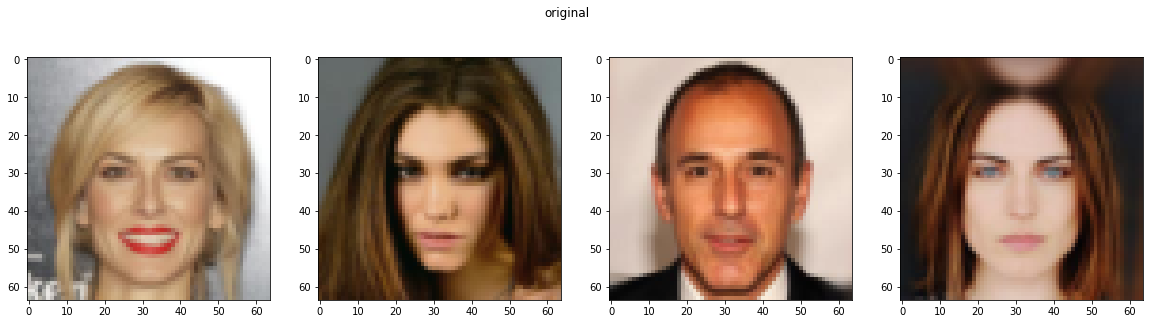

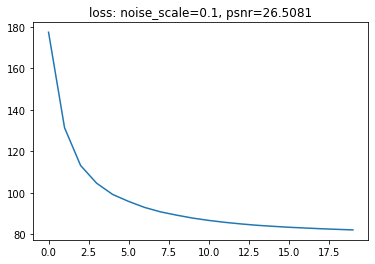

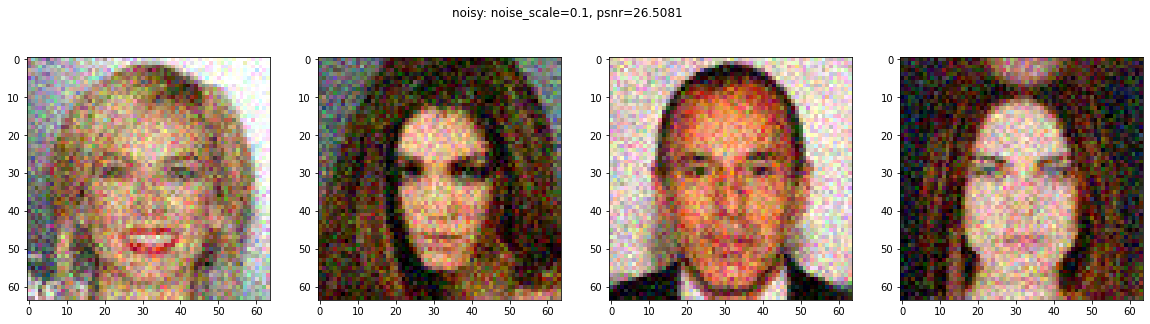

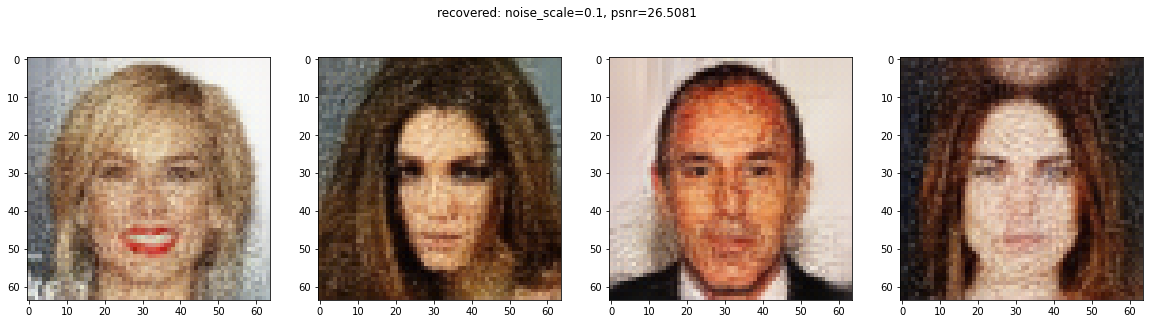

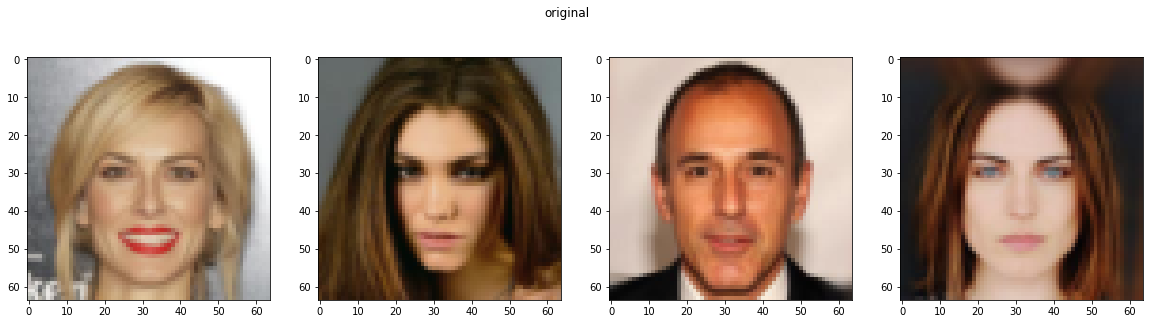

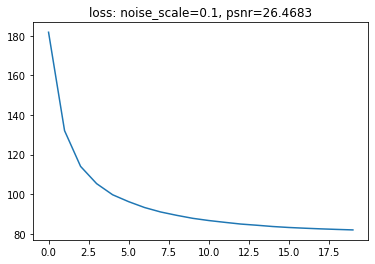

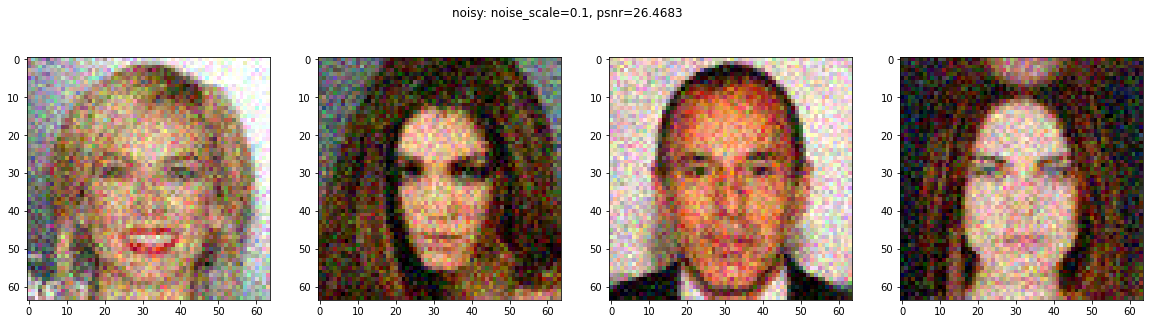

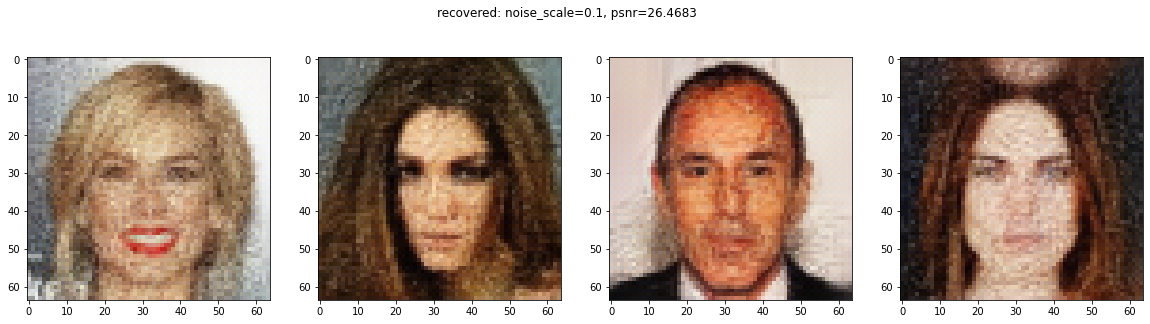

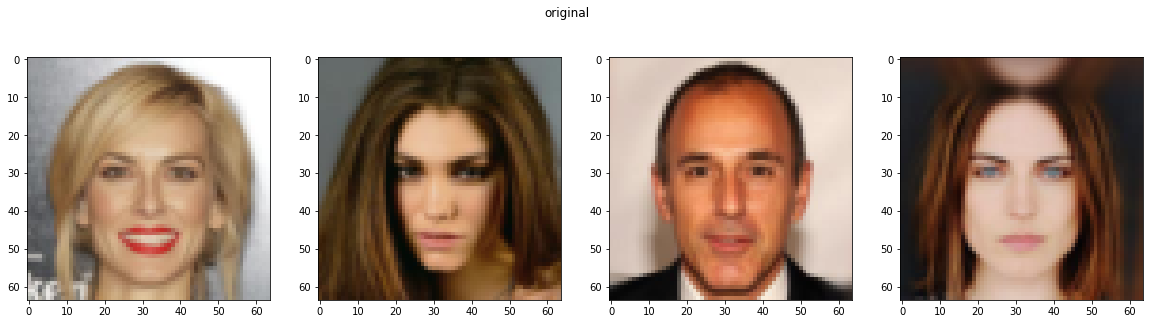

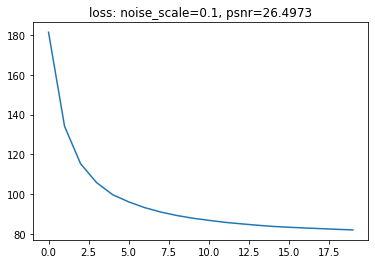

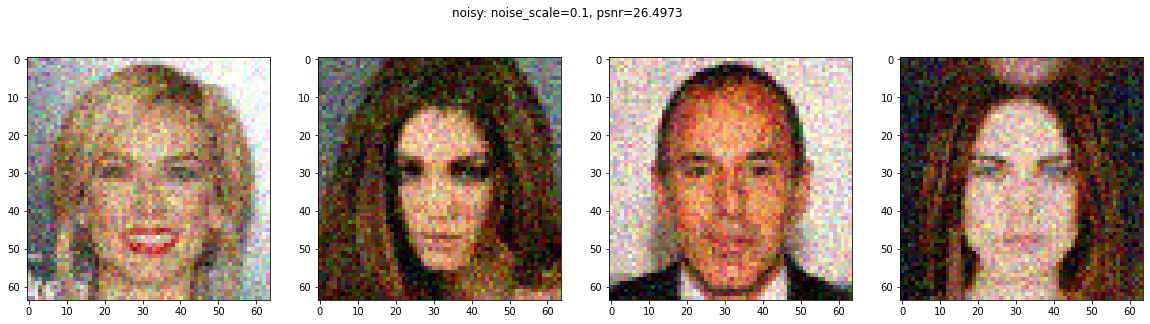

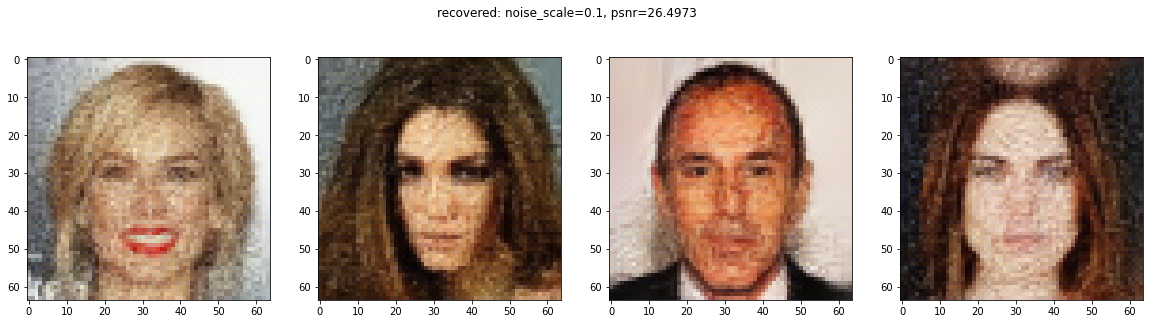

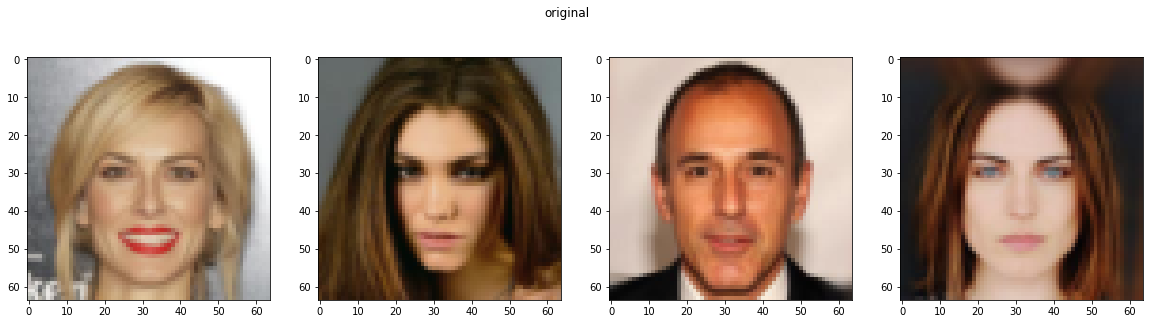

In [21]:
for trial in results:
    noise_info = trial.split('_')[1]
    noise_loc, noise_scale = noise_info.split('#')
    noise, noisy, original, recovered, residual_curve = load_trained(trial)
    
    psnr = [compare_psnr(x, y) for x,y in zip(original, recovered)]
    
    _ = plt.plot(residual_curve)
    _ = plt.title(f'loss: noise_scale={noise_scale}, psnr={np.mean(psnr):.4f}')
    _ = plt.show()
    
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
    for noisy, ax in zip(noisy, axes):
        ax.imshow(noisy.transpose(0, 1, 2))
    _ = plt.suptitle(f'noisy: noise_scale={noise_scale}, psnr={np.mean(psnr):.4f}')
    _ = plt.show()
    
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
    for recover, ax in zip(recovered, axes):
        ax.imshow(recover.transpose(0, 1, 2))
    _ = plt.suptitle(f'recovered: noise_scale={noise_scale}, psnr={np.mean(psnr):.4f}')
    _ = plt.show()
    
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
    for ori, ax in zip(original, axes):
        ax.imshow(ori.transpose(0, 1, 2))
    _ = plt.suptitle(f'original')
    _ = plt.show()
    
    

In [26]:
noisy.shape

(4, 64, 64, 3)